In [66]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.animation as animation

import imageio

import datetime


In [67]:
# C:\Users\cruze\Documents\GitHub\covid19\csse_covid_19_data\csse_covid_19_time_series

# confirmed_path = os.path.join(os.getcwd(), 'csse_covid_19_data', 'csse_covid_19_time_series', 'time_series_covid19_confirmed_US.csv')
confirmed_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
confDF = pd.read_csv(confirmed_URL)

# global_path = os.path.join(os.getcwd(), 'csse_covid_19_data', 'csse_covid_19_time_series', 'time_series_covid19_confirmed_global.csv')
global_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
globalDF = pd.read_csv(global_URL)

# death_path = os.path.join(os.getcwd(), 'csse_covid_19_data', 'csse_covid_19_time_series', 'time_series_covid19_deaths_US.csv')
deathsUS_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv'
deathDF = pd.read_csv(deathsUS_URL)

deathsGlobal_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
deathGlobalDF = pd.read_csv(deathsGlobal_URL)
# dateDict = dict(zip(confDF.columns[11:], pd.to_datetime(confDF.columns[11:])))
# confDF = confDF.rename(dateDict, axis='columns')

In [68]:
byStateDF = confDF.groupby('Province_State').sum()

states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming']

byStateDF = byStateDF.loc[states]

deathStateDF = deathDF.groupby('Province_State').sum()

deathStateDF = deathStateDF.loc[states]

In [69]:
# byStateDF[byStateDF < 1] = 1

dfData = byStateDF.iloc[:, 5:]

#add South Korea and Italy
temp = globalDF[globalDF['Country/Region']=='Korea, South'].iloc[:,5:]
temp = temp.append(globalDF[globalDF['Country/Region']=='Italy'].iloc[:,5:])
temp = temp.append(globalDF[globalDF.index==223].iloc[:,5:])
temp = temp.rename(index={143 : 'South Korea', 137 : 'Italy', 223 : 'United Kingdom'})
dfData = dfData.append(temp)


dfLabels = byStateDF.iloc[:, :5]
labels = dfLabels.index.tolist()
labels.append('South Korea')
labels.append('Italy')
labels.append('United Kingdom')

dfDiff = dfData.diff(axis=1).iloc[:,1:]
dfData = dfData.iloc[:,1:]

dfDiff = dfDiff.transpose().rolling(window=3).mean().transpose()

plt_path = os.path.join(os.getcwd(), 'plots')

dfData[dfData < 1] = 1
dfDiff[dfDiff < 1] = 1

# dfDiff.to_csv('diff.csv')
# dfData.to_csv('state.csv')

In [70]:

for j in range(0,int(len(dfData.columns))):

    plotname = 'plot' + str(j).zfill(4) + '.png'
    plot_path = os.path.join(os.getcwd(), 'plots', plotname)
    

    plt.figure(figsize=(22, 10))
    plt.plot(dfData.iloc[:,:j].transpose(), dfDiff.iloc[:,:j].transpose(), alpha=0.2)

    for i, lab in enumerate(labels):
        x = dfData.iloc[i,j-1]
        y = dfDiff.iloc[i,j-1]
        plt.scatter(x, y, marker='o', color='red')
        plt.text(x+0.5, y+0.5, lab, fontsize=11)

    plt.title('Confirmed Cases on ' + dfData.iloc[:,j].name + ' vs. Total Cases ')
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('Total Cases')
    plt.ylabel('New Daily Cases')
    plt.xlim(1, 1000000)
    plt.ylim(1, 100000)
    plt.xticks(rotation='vertical')

    plt.savefig(plot_path)
    plt.clf()
    plt.close()
    # plt.show()


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

In [71]:

img_path = os.path.join(os.getcwd(), 'plots')
filenames = os.listdir(img_path)
save_path = os.path.join(os.getcwd(), 'animated.gif')

print('reading files...')

d = "plots"
filenames = []
for path in os.listdir(d):
    full_path = os.path.join(d, path)
    if os.path.isfile(full_path):
        filenames.append(full_path)

print('saving gif...')

filenames = filenames[-10:]

images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave(save_path, images, duration=.7)

reading files...
saving gif...


------------------------------------------------------------------------

below this line in progress

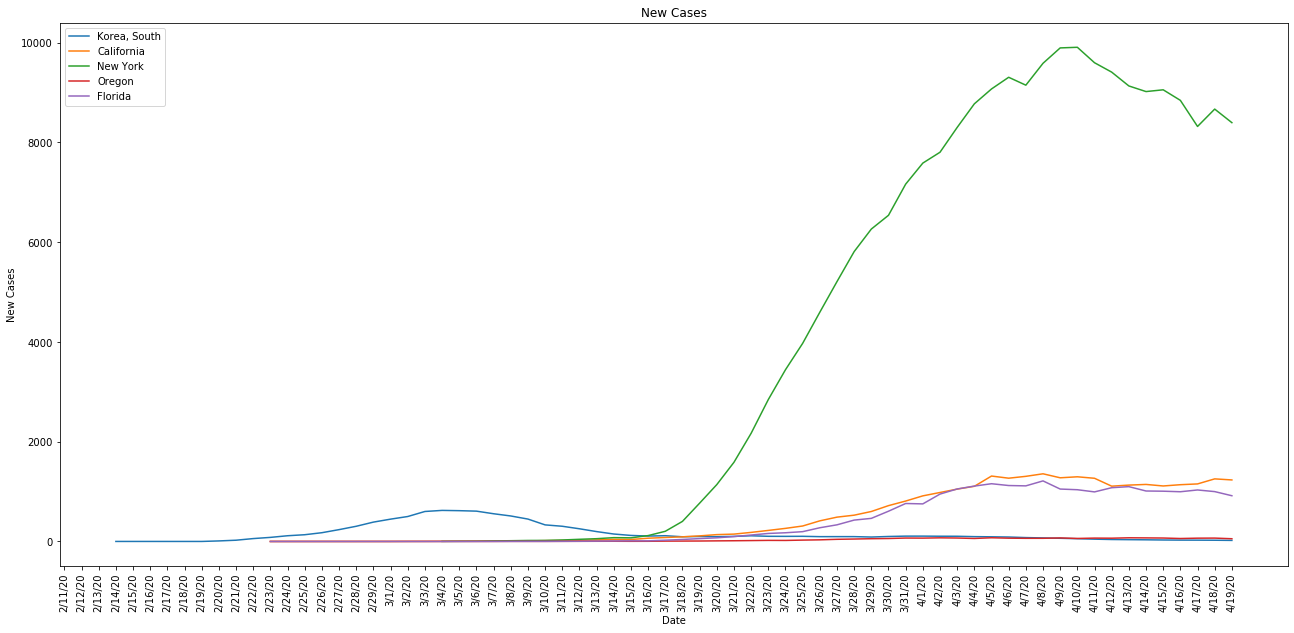

In [72]:

plt.figure(figsize=(22, 10))

# plt.plot(globalDF[globalDF['Country/Region']=='Italy'].iloc[:,4:].transpose())

plt.plot(globalDF[globalDF['Country/Region']=='Korea, South'].iloc[:,20:].transpose().diff().rolling(window=7).mean(), label='Korea, South')
# plt.plot(globalDF[globalDF['Country/Region']=='Italy'].iloc[:,20:].transpose().diff().rolling(window=7).mean(), label='Italy')


plt.plot(byStateDF[byStateDF.index=='California'].iloc[:,30:].transpose().diff().rolling(window=7).mean(), label='California')
plt.plot(byStateDF[byStateDF.index=='New York'].iloc[:,40:].transpose().diff().rolling(window=7).mean(), label='New York')
# plt.plot(byStateDF[byStateDF.index=='New Jersey'].iloc[:,40:].transpose().diff().rolling(window=7).mean(), label='New Jersey')
plt.plot(byStateDF[byStateDF.index=='Oregon'].iloc[:,30:].transpose().diff().rolling(window=7).mean(), label='Oregon')
plt.plot(byStateDF[byStateDF.index=='Florida'].iloc[:,30:].transpose().diff().rolling(window=7).mean(), label='Florida')
# plt.plot(byStateDF[byStateDF.index=='Georgia'].iloc[:,30:].transpose().diff().rolling(window=7).mean(), label='Georgia')
# plt.plot(byStateDF[byStateDF.index=='South Carolina'].iloc[:,30:].transpose().diff().rolling(window=7).mean(), label='South Carolina')
# plt.plot(byStateDF[byStateDF.index=='Louisiana'].iloc[:,30:].transpose().diff().rolling(window=7).mean(), label='Louisiana')
# plt.plot(byStateDF[byStateDF.index=='Michigan'].iloc[:,30:].transpose().diff().rolling(window=7).mean(), label='Michigan')
# plt.plot(byStateDF[byStateDF.index=='Texas'].iloc[:,30:].transpose().diff().rolling(window=7).mean(), label='Texas')
# plt.plot(byStateDF[byStateDF.index=='Massachusetts'].iloc[:,30:].transpose().diff().rolling(window=7).mean(), label='Massachusetts')
# plt.plot(byStateDF[byStateDF.index=='Illinois'].iloc[:,30:].transpose().diff().rolling(window=7).mean(), label='Illinois')
# plt.plot(byStateDF[byStateDF.index=='Washington'].iloc[:,30:].transpose().diff().rolling(window=7).mean(), label='Washington')

# plt.plot(globalDF[globalDF.index==223].iloc[:,10:].transpose().diff().rolling(window=7).mean(), label='UK')

# plt.plot(byStateDF[byStateDF.index=='California'].iloc[:,5:].transpose().diff().rolling(window=7).mean())
# plt.plot(byStateDF[byStateDF.index=='Oregon'].iloc[:,5:].transpose())

# for i, lab in enumerate(labels):
#     x = dfData.iloc[i,j]
#     y = dfDiff.iloc[i,j]
#     plt.scatter(x, y, marker='o', color='red')
#     plt.text(x+0.3, y+0.3, lab, fontsize=12)

plt.title('New Cases')
# plt.yscale('log')
# plt.xscale('log')
plt.xlabel('Date')
plt.ylabel('New Cases')
# plt.xlim(left='2/19/2020')
# plt.ylim(1, 100000)
plt.legend(loc='best')
plt.xticks(rotation='vertical')

# plt.savefig(plot_path)
# plt.clf()
# plt.close()
plt.show()


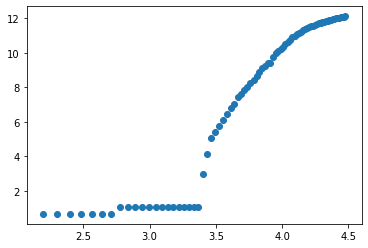

In [74]:
# np.array(globalDF[globalDF['Country/Region']=='Italy'].iloc[:,4:].transpose())

y = np.array(globalDF[globalDF['Country/Region']=='Italy'].iloc[:,4:].transpose())
x = np.arange(np.array(globalDF[globalDF['Country/Region']=='Italy'].iloc[:,4:].transpose()).shape[0])

plt.scatter(np.log(x), np.log(y))
plt.show()

In [75]:
deathGlobalDF[deathGlobalDF['Country/Region']=='Korea, South'].iloc[:,-1] / globalDF[globalDF['Country/Region']=='Korea, South'].iloc[:,-1]

# globalDF[globalDF['Country/Region']=='Italy'].iloc[:,-1]

# deathGlobalDF[deathGlobalDF['Country/Region']=='Korea, South'].iloc[:,-1]

# deathGlobalDF[deathGlobalDF['Country/Region']=='Italy'].iloc[:,-1] / globalDF[globalDF['Country/Region']=='Italy'].iloc[:,-1]



# deathStateDF[deathStateDF.index=='New York'].iloc[:,-1] / byStateDF[byStateDF.index=='New York'].iloc[:,-1]


deathGlobalDF[deathGlobalDF['Country/Region']=='Philippines'].iloc[:,-1] / globalDF[globalDF['Country/Region']=='Philippines'].iloc[:,-1]

182    0.065346
Name: 4/19/20, dtype: float64

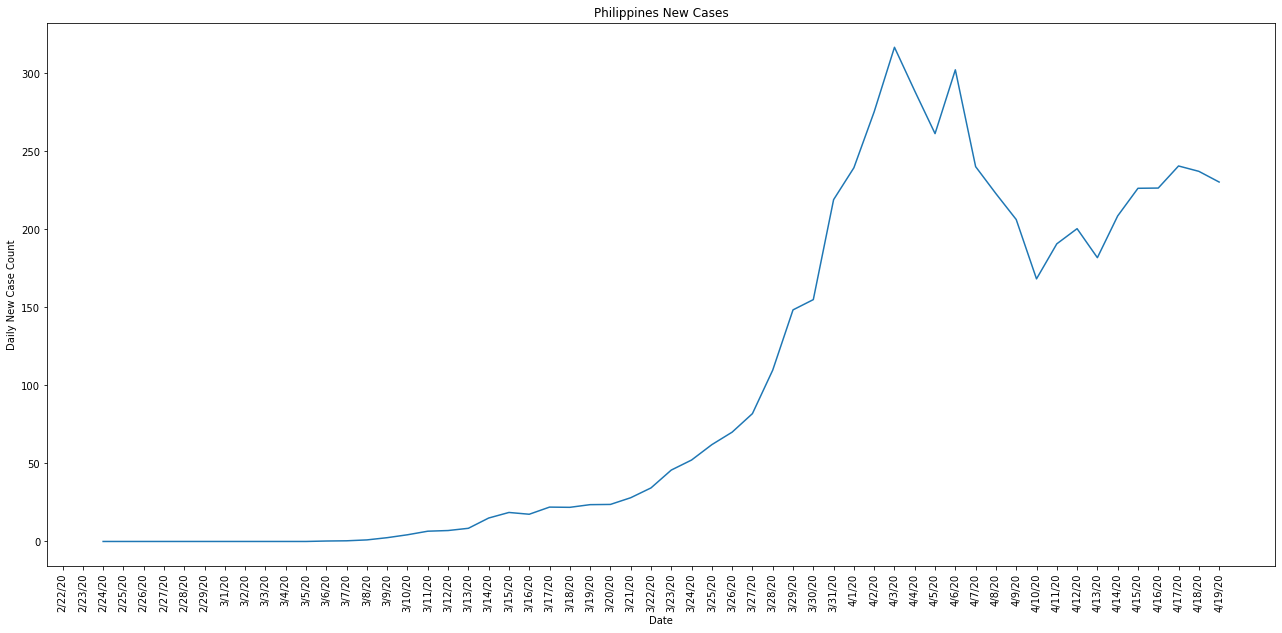

In [81]:


plt.figure(figsize=(22, 10))

# plt.plot(deathGlobalDF[deathGlobalDF['Country/Region']=='Korea, South'].iloc[:,20:].transpose().diff().rolling(window=7).mean())
plt.plot(globalDF[globalDF['Country/Region']=='Philippines'].iloc[:,30:].transpose().diff().rolling(window=7).mean())

# plt.plot(byStateDF[byStateDF.index=='California'].iloc[:,5:].transpose().diff().rolling(window=7).mean())
# plt.plot(byStateDF[byStateDF.index=='Oregon'].iloc[:,5:].transpose())

# for i, lab in enumerate(labels):
#     x = dfData.iloc[i,j]
#     y = dfDiff.iloc[i,j]
#     plt.scatter(x, y, marker='o', color='red')
#     plt.text(x+0.3, y+0.3, lab, fontsize=12)

plt.title('Philippines New Cases')
# plt.yscale('log')
# plt.xscale('log')
plt.xlabel('Date')
plt.ylabel('Daily New Case Count')
# plt.xlim(left='2/19/2020')
# plt.ylim(1, 100000)
# plt.legend(loc='left')
plt.xticks(rotation='vertical')

# plt.savefig(plot_path)
# plt.clf()
# plt.close()
plt.show()

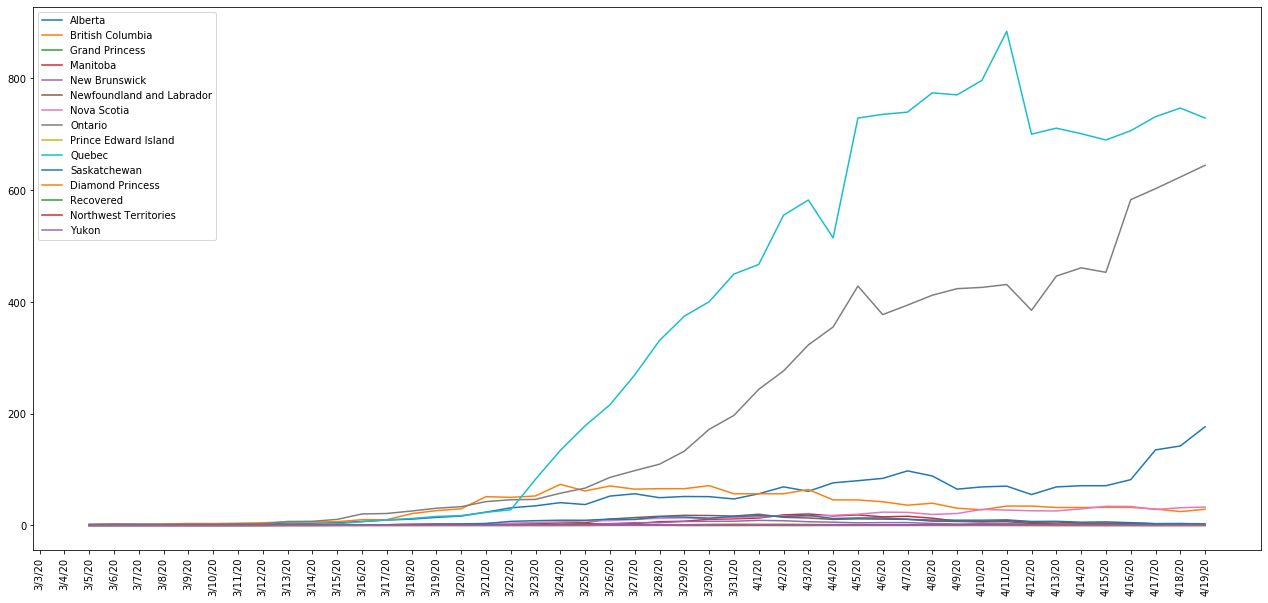

In [77]:
plt.figure(figsize=(22, 10))


plt.plot(globalDF[globalDF['Country/Region']=='Canada'].iloc[:,40:].transpose().diff().rolling(window=7).mean())

labels = globalDF[globalDF['Country/Region']=='Canada']['Province/State'].to_list()

plt.legend(labels, loc='left')
plt.xticks(rotation='vertical')

plt.show()



In [78]:
confDF[confDF['Province_State']=='California'].sort_values(by=confDF.columns[-1], ascending=False)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20
209,84006037,US,USA,840,6037.0,Los Angeles,California,US,34.308284,-118.228241,...,8443,8453,8894,9433,10047,10517,10854,11400,12021,12341
223,84006065,US,USA,840,6065.0,Riverside,California,US,33.743150,-115.993358,...,1350,1431,1619,1619,1961,1961,2105,2457,2457,2638
227,84006073,US,USA,840,6073.0,San Diego,California,US,33.034846,-116.736533,...,1628,1693,1761,1804,1847,1930,2012,2087,2158,2213
233,84006085,US,USA,840,6085.0,Santa Clara,California,US,37.231049,-121.697046,...,1442,1484,1566,1666,1666,1793,1833,1870,1870,1870
220,84006059,US,USA,840,6059.0,Orange,California,US,33.701475,-117.764600,...,1138,1221,1277,1283,1299,1376,1425,1501,1556,1636
226,84006071,US,USA,840,6071.0,San Bernardino,California,US,34.840603,-116.177469,...,729,810,810,887,977,977,996,1032,1219,1286
191,84006001,US,USA,840,6001.0,Alameda,California,US,37.646294,-121.892927,...,766,806,845,888,888,964,1007,1063,1114,1164
228,84006075,US,USA,840,6075.0,San Francisco,California,US,37.752151,-122.438567,...,797,857,872,957,987,1013,1019,1058,1137,1157
224,84006067,US,USA,840,6067.0,Sacramento,California,US,38.451068,-121.342537,...,653,653,707,739,816,853,879,896,914,925
231,84006081,US,USA,840,6081.0,San Mateo,California,US,37.422881,-122.327555,...,638,652,652,701,721,747,767,797,838,838


In [79]:
confDF[confDF['Province_State']=='Oregon'].sort_values(by=confDF.columns[-1], ascending=False)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20
2238,84041051,US,USA,840,41051.0,Multnomah,Oregon,US,45.547480,-122.416935,...,302,317,374,398,420,430,448,467,493,514
2246,84041067,US,USA,840,41067.0,Washington,Oregon,US,45.559727,-123.095526,...,311,320,348,360,365,364,376,383,387,399
2236,84041047,US,USA,840,41047.0,Marion,Oregon,US,44.902879,-122.581512,...,235,246,276,280,289,294,309,317,335,358
2215,84041005,US,USA,840,41005.0,Clackamas,Oregon,US,45.187874,-122.217963,...,109,116,125,132,135,142,150,153,154,161
2221,84041017,US,USA,840,41017.0,Deschutes,Oregon,US,43.915702,-121.228912,...,50,51,54,54,55,55,59,61,63,64
2234,84041043,US,USA,840,41043.0,Linn,Oregon,US,44.488995,-122.537315,...,49,49,52,52,52,53,54,57,59,59
2227,84041029,US,USA,840,41029.0,Jackson,Oregon,US,42.432011,-122.728931,...,44,44,46,47,47,47,47,48,49,49
2232,84041039,US,USA,840,41039.0,Lane,Oregon,US,43.937270,-122.847753,...,33,34,37,41,42,44,45,46,46,48
2248,84041071,US,USA,840,41071.0,Yamhill,Oregon,US,45.233304,-123.308696,...,29,28,30,30,32,32,33,35,34,34
2239,84041053,US,USA,840,41053.0,Polk,Oregon,US,44.903228,-123.412889,...,29,29,30,30,30,30,30,31,32,32


In [82]:
# byStateDF[byStateDF.index=='New York']

stateDeathDF = deathDF.groupby('Province_State').sum()

stateDeathDF[stateDeathDF.index=='Oregon']

,UID,code3,FIPS,Lat,Long_,Population,1/22/20,1/23/20,1/24/20,1/25/20,...,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20
Province_State,,,,,,,,,,,,,,,,,,,,,
Oregon,3193647378,31920,1647378.0,1601.726424,-4373.169106,4217737,0,0,0,0,...,44,48,52,53,55,58,64,70,72,74
